# Challenge
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.<br>
Did people become happier from 2012 to 2014? Compute results for each country in the sample.<br>
Who reported watching more TV in 2012, men or women?<br>
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?<br>
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?<br>
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats

## Data

In [2]:
ess = pd.read_csv('/Users/marenbeckman/Desktop/Data_Science/ESSdata_Thinkful.csv')


In [3]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
ess.shape

(8594, 13)

In [55]:
ess.dropna()
ess.shape

(8594, 13)

In [6]:
ess.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


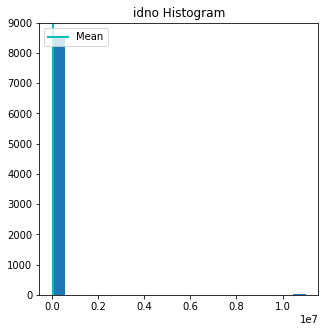

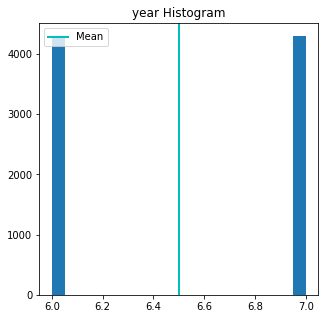

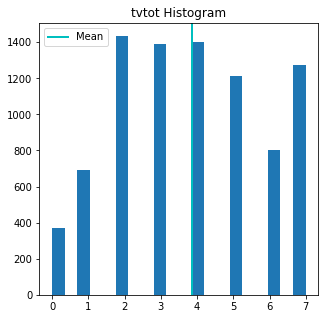

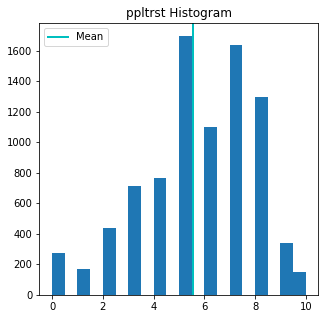

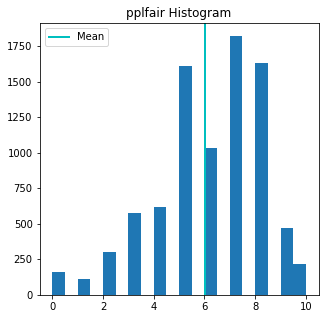

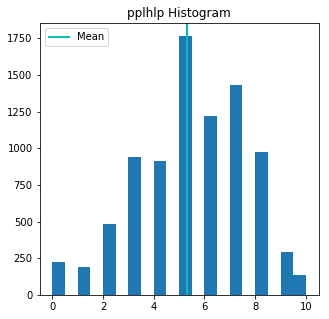

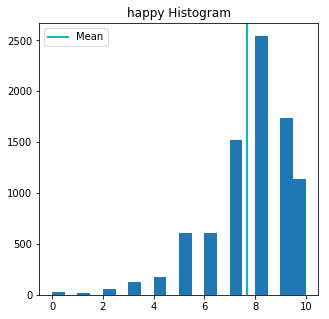

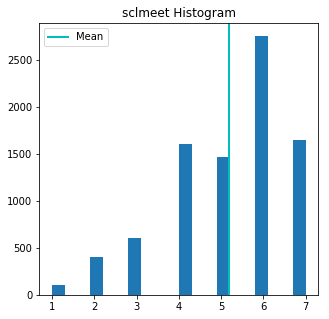

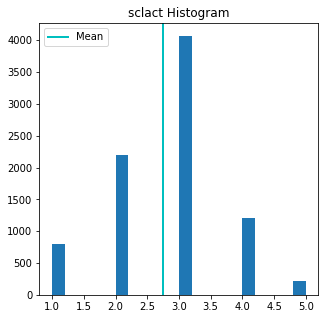

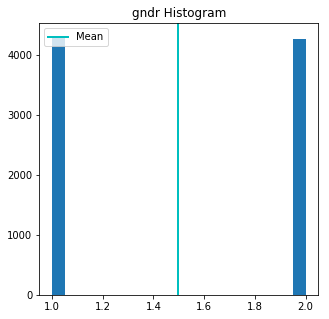

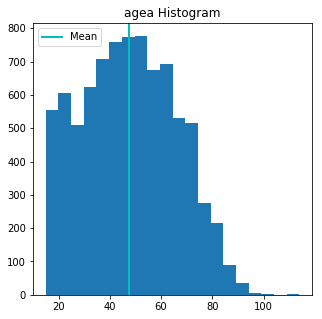

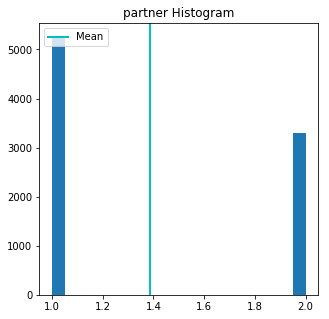

In [26]:
from pandas.api.types import is_numeric_dtype

# Visualize distributions of each column
for column in ess:
    
    if is_numeric_dtype(ess[column]):
    
        plt.figure(figsize=(5, 5))

        plt.hist(ess[column].dropna(how = 'any'), bins=20)
        plt.axvline(ess[column].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
        plt.legend(loc='upper left') 
        plt.title(column + ' Histogram')

        plt.show()


In [7]:
ess.groupby('cntry').describe()

agea                                                         gndr  \
        count       mean        std   min   25%   50%   75%    max   count   
cntry                                                                        
CH     1503.0  46.743180  18.632669  16.0  32.0  46.0  61.0   94.0  1546.0   
CZ     1280.0  46.301563  16.888995  15.0  34.0  46.0  59.0   91.0  1306.0   
DE       28.0  55.892857  16.067771  26.0  49.0  55.5  65.5   89.0    28.0   
ES     2360.0  47.874576  18.200719  16.0  34.0  47.0  61.0  103.0  2426.0   
NO     1436.0  46.536212  18.203938  15.0  32.0  46.0  60.0   94.0  1462.0   
SE     1748.0  49.040046  19.536782  15.0  32.0  50.0  65.0  114.0  1816.0   

                ...  tvtot         year                                     \
           mean ...    75%  max   count mean       std  min  25%  50%  75%   
cntry           ...                                                          
CH     1.513583 ...    4.0  7.0  1546.0  6.5  0.500162  6.0  6.0  6.5  7.0   
CZ     1.525268 ...    7.0  7.0  1316.0  6.5  0.500190  6.0  6.0  6.5  7.0   
DE     1.571429 ...    6.0  7.0    28.0  6.5  0.509175  6.0  6.0  6.5  7.0   
ES     1.504534 ...    6.0  7.0  2426.0  6.5  0.500103  6.0  6.0  6.5  7.0   
NO     1.466484 ...    5.0  7.0  1462.0  6.5  0.500171  6.0  6.0  6.5  7.0   
SE     1.476872 ...    5.0  7.0  1816.0  6.5  0.500138  6.0  6.0  6.5  7.0   

            
       max  
cntry       
CH     7.0  
CZ     7.0  
DE     7.0  
ES     7.0  
NO     7.0  
SE     7.0  

[6 rows x 96 columns]

In [9]:
Switzerland = ess.loc[ess.cntry == 'CH']
Czech = ess.loc[ess.cntry == 'CZ']
Germany = ess.loc[ess.cntry == 'DE']
Spain = ess.loc[ess.cntry == 'ES']
Norway = ess.loc[ess.cntry == 'NO']
Sweden = ess.loc[ess.cntry == 'SE']

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [18]:
# break up country data by year
Switzerland2012 = Switzerland.loc[Switzerland.year == 6]
Switzerland2014 = Switzerland.loc[Switzerland.year == 7]

Czech2012 = Czech.loc[Czech.year == 6]
Czech2014 = Czech.loc[Czech.year == 7]

Germany2012 = Germany.loc[Germany.year == 6]
Germany2014 = Germany.loc[Germany.year == 7]

Spain2012 = Spain.loc[Spain.year == 6]
Spain2014 = Spain.loc[Spain.year == 7]

Norway2012 = Norway.loc[Norway.year == 6]
Norway2014 = Norway.loc[Norway.year == 7]

Sweden2012 = Sweden.loc[Sweden.year == 6]
Sweden2014 = Sweden.loc[Sweden.year == 7]

In [51]:
# responses per year by country
print('Switzerland')
print(Switzerland2012.shape, Switzerland2014.shape)

print('\nCzech Republic')
print(Czech2012.shape, Czech2014.shape)

print('\nGermany')
print(Germany2012.shape, Germany2014.shape)

print('\nSpain')
print(Spain2012.shape, Spain2014.shape)

print('\nNorway')
print(Norway2012.shape, Norway2014.shape)

print('\nSweden')
print(Sweden2012.shape, Sweden2014.shape)

Switzerland
(773, 13) (773, 13)

Czech Republic
(658, 13) (658, 13)

Germany
(14, 13) (14, 13)

Spain
(1213, 13) (1213, 13)

Norway
(731, 13) (731, 13)

Sweden
(908, 13) (908, 13)


In [40]:
print('Switzerland')
print(stats.ttest_rel(Switzerland2012['ppltrst'],Switzerland2014['ppltrst']))

print('\nCzech Republic')
print(stats.ttest_rel(Czech2012['ppltrst'],Czech2014['ppltrst']))

print('\nGermany')
print(stats.ttest_rel(Germany2012['ppltrst'],Germany2014['ppltrst']))

print('\nSpain')
print(stats.ttest_rel(Spain2012['ppltrst'],Spain2014['ppltrst']))

print('\nNorway')
print(stats.ttest_rel(Norway2012['ppltrst'],Norway2014['ppltrst']))

print('\nSweden')
print(stats.ttest_rel(Sweden2012['ppltrst'],Sweden2014['ppltrst']))

Switzerland
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

Czech Republic
Ttest_relResult(statistic=nan, pvalue=nan)

Germany
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Spain
Ttest_relResult(statistic=nan, pvalue=nan)

Norway
Ttest_relResult(statistic=nan, pvalue=nan)

Sweden
Ttest_relResult(statistic=nan, pvalue=nan)


In [56]:
Czech2012.shape

(658, 13)

In [57]:
Czech2014.shape

(658, 13)

In [58]:
Czech2012['ppltrst'].describe()

count    651.000000
mean       4.362519
std        2.409738
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: ppltrst, dtype: float64

In [59]:
Czech2014['ppltrst'].describe()

count    657.000000
mean       4.424658
std        2.305389
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: ppltrst, dtype: float64

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [60]:
print('Switzerland')
print(stats.ttest_rel(Switzerland2012['happy'],Switzerland2014['happy']))

print('\nCzech Republic')
print(stats.ttest_rel(Czech2012['happy'],Czech2014['happy']))

print('\nGermany')
print(stats.ttest_rel(Germany2012['happy'],Germany2014['happy']))

print('\nSpain')
print(stats.ttest_rel(Spain2012['happy'],Spain2014['happy']))

print('\nNorway')
print(stats.ttest_rel(Norway2012['happy'],Norway2014['happy']))

print('\nSweden')
print(stats.ttest_rel(Sweden2012['happy'],Sweden2014['happy']))

Switzerland
Ttest_relResult(statistic=nan, pvalue=nan)

Czech Republic
Ttest_relResult(statistic=nan, pvalue=nan)

Germany
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Spain
Ttest_relResult(statistic=nan, pvalue=nan)

Norway
Ttest_relResult(statistic=nan, pvalue=nan)

Sweden
Ttest_relResult(statistic=nan, pvalue=nan)


In [61]:
Switzerland2012['happy'].value_counts()

8.0     272
9.0     183
10.0    119
7.0     115
6.0      36
5.0      31
3.0       6
4.0       4
2.0       2
1.0       1
0.0       1
Name: happy, dtype: int64

In [62]:
Switzerland2014['happy'].value_counts()

8.0     254
9.0     210
10.0    114
7.0     109
6.0      43
5.0      29
4.0       8
3.0       4
2.0       1
0.0       1
Name: happy, dtype: int64

## Who reported watching more TV in 2012, men or women?

In [63]:
year2012 = ess.loc[ess.year == 6]

In [65]:
women2012 = year2012.loc[year2012.gndr == 2]
men2012 = year2012.loc[year2012.gndr == 1]

In [66]:
stats.ttest_ind(women2012['tvtot'], men2012['tvtot'])

Ttest_indResult(statistic=nan, pvalue=nan)

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [67]:
partner2012 = year2012.loc[year2012.partner == 1]
alone2012 = year2012.loc[year2012.partner == 2]

In [80]:
partner_fair = partner2012['pplfair'][partner2012['pplfair'] > 5].count() / partner2012['pplfair'].count()
print('Percentage of people living with partner who believe people are mostly fair: ', partner_fair)

Percentage of people living with partner who believe people are mostly fair:  0.6271122793841533


In [81]:
alone_fair = alone2012['pplfair'][alone2012['pplfair'] > 5].count() / alone2012['pplfair'].count()
print('Percentage of people living with partner who believe people are mostly fair: ', alone_fair)

Percentage of people living with partner who believe people are mostly fair:  0.5677860696517413


People living with a partner were more likely (by eight points) to view people as mostly fair in 2012 than those living alone.

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?